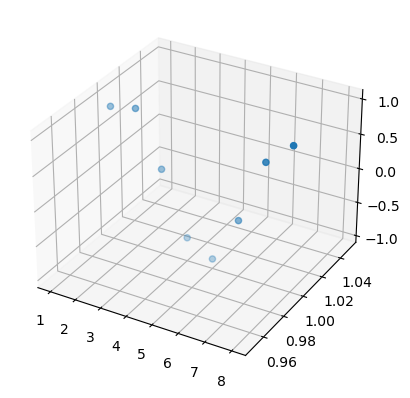

In [14]:
import matplotlib.pyplot as plt
import numpy as np

ax = plt.figure().add_subplot(projection='3d')

X = [1,2,3,4,5,6,7,8]
Y = [1]*len(X)
Z = np.sin(X)

ax.scatter(X, Y, Z)
plt.show()

In [11]:
print(X, Y, Z)

[[ 0.          0.20408163  0.40816327 ...  9.59183673  9.79591837
  10.        ]
 [ 0.          0.20408163  0.40816327 ...  9.59183673  9.79591837
  10.        ]
 [ 0.          0.20408163  0.40816327 ...  9.59183673  9.79591837
  10.        ]
 ...
 [ 0.          0.20408163  0.40816327 ...  9.59183673  9.79591837
  10.        ]
 [ 0.          0.20408163  0.40816327 ...  9.59183673  9.79591837
  10.        ]
 [ 0.          0.20408163  0.40816327 ...  9.59183673  9.79591837
  10.        ]] [[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.20408163  0.20408163  0.20408163 ...  0.20408163  0.20408163
   0.20408163]
 [ 0.40816327  0.40816327  0.40816327 ...  0.40816327  0.40816327
   0.40816327]
 ...
 [ 9.59183673  9.59183673  9.59183673 ...  9.59183673  9.59183673
   9.59183673]
 [ 9.79591837  9.79591837  9.79591837 ...  9.79591837  9.79591837
   9.79591837]
 [10.         10.         10.         ... 10.         10.
  10.        ]] [[ 1.          1.20266794  1.396